In [1]:
# Customer Support KPI Dashboard - SQL + Python Style

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
print("\nLoading support ticket data...")
df = pd.read_csv("customer_support_tickets.csv")
print(df.head())



Loading support ticket data...
    Ticket_ID Channel        Category Priority Created_Date Resolved_Date  \
0  TKT_100000   Phone  Account Access      Low   2024-12-16    2024-12-20   
1  TKT_100001   Phone         General   Medium   2024-12-26    2024-12-28   
2  TKT_100002     Web  Account Access      Low   2025-01-08    2025-01-08   
3  TKT_100003    Chat         Billing     High   2024-11-28    2024-11-29   
4  TKT_100004     Web  Account Access      Low   2024-09-15    2024-09-16   

     Status     Agent  
0  Resolved  Agent_19  
1  Resolved   Agent_2  
2  Resolved  Agent_12  
3  Resolved  Agent_10  
4  Resolved  Agent_19  


In [3]:
# Convert dates
df['Created_Date'] = pd.to_datetime(df['Created_Date'])
df['Resolved_Date'] = pd.to_datetime(df['Resolved_Date'])


In [4]:
# Create derived fields
df['Resolution_Time (days)'] = (df['Resolved_Date'] - df['Created_Date']).dt.days



Average Resolution Time by Channel:
  Channel  Resolution_Time (days)
0    Chat                2.771028
1   Email                2.231111
2   Phone                2.409283
3     Web                2.623318


/var/folders/bq/5vjrfz8d501bv3f9dl1qhwrm0000gn/T/ipykernel_47408/2396395389.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_res_by_channel, x='Channel', y='Resolution_Time (days)', palette='Set2')


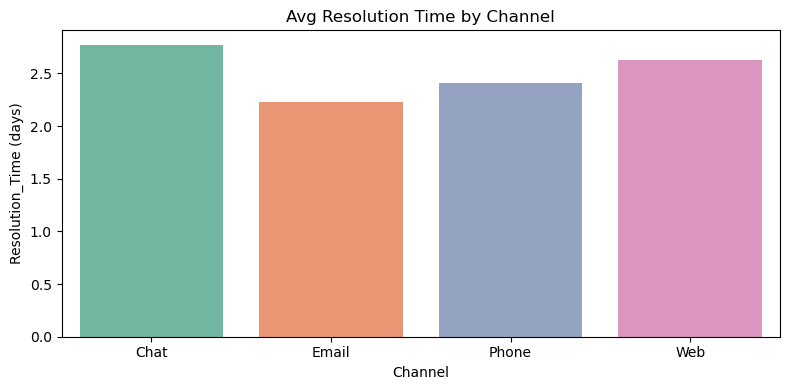

In [5]:
# =====================================
# 1. Avg Resolution Time by Channel
# =====================================
avg_res_by_channel = df[df['Status'] == 'Resolved'].groupby('Channel')['Resolution_Time (days)'].mean().reset_index()
print("\nAverage Resolution Time by Channel:")
print(avg_res_by_channel)

plt.figure(figsize=(8, 4))
sns.barplot(data=avg_res_by_channel, x='Channel', y='Resolution_Time (days)', palette='Set2')
plt.title('Avg Resolution Time by Channel')
plt.tight_layout()
plt.show()


Ticket Volume by Category and Priority:
Priority        High  Low  Medium
Category                         
Account Access    40   62     150
Billing           48   67     142
General           48   80     115
Technical         53   77     118


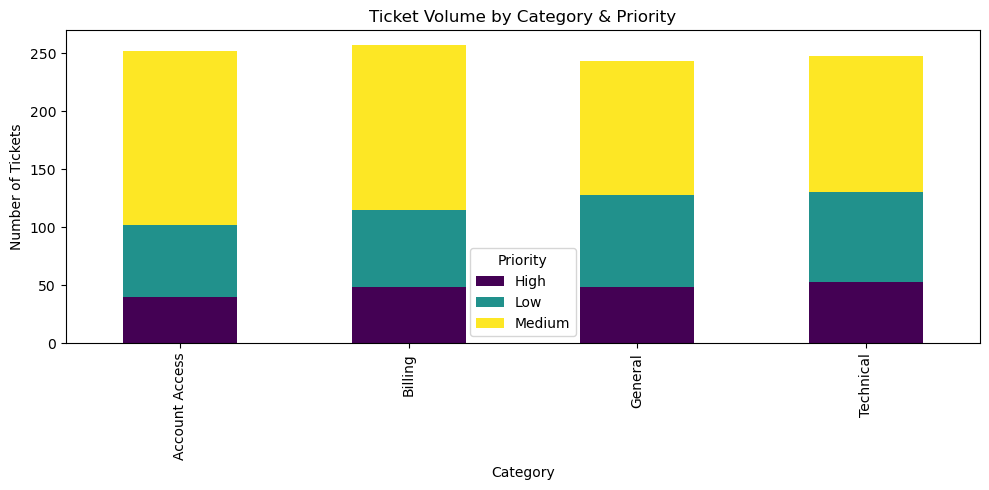

In [6]:
# =====================================
# 2. Ticket Volume by Category and Priority
# =====================================
ticket_volume = df.groupby(['Category', 'Priority']).size().unstack().fillna(0)
print("\nTicket Volume by Category and Priority:")
print(ticket_volume)

ticket_volume.plot(kind='bar', stacked=True, figsize=(10, 5), colormap='viridis')
plt.title('Ticket Volume by Category & Priority')
plt.ylabel('Number of Tickets')
plt.tight_layout()
plt.show()


SLA Compliance by Channel:
  Channel   SLA_Met  SLA_Met (%)
0    Chat  0.607477    60.747664
1   Email  0.635556    63.555556
2   Phone  0.645570    64.556962
3     Web  0.605381    60.538117


/var/folders/bq/5vjrfz8d501bv3f9dl1qhwrm0000gn/T/ipykernel_47408/2824416050.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sla_rate, x='Channel', y='SLA_Met (%)', palette='coolwarm')


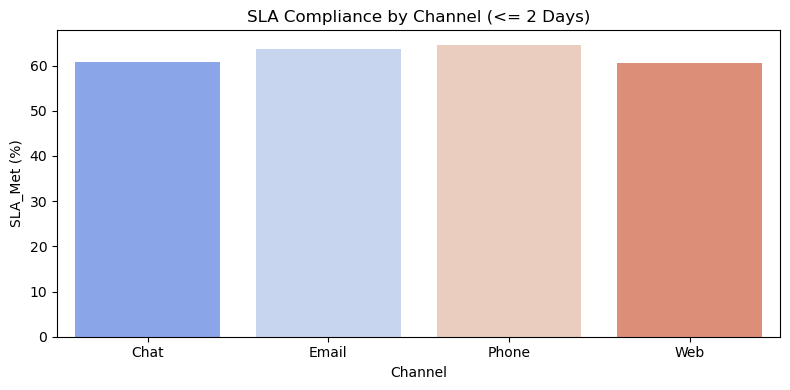

In [7]:
# =====================================
# 3. SLA Compliance: Resolved < 2 Days
# =====================================
df['SLA_Met'] = df['Resolution_Time (days)'] <= 2
sla_rate = df[df['Status'] == 'Resolved'].groupby('Channel')['SLA_Met'].mean().reset_index()
sla_rate['SLA_Met (%)'] = sla_rate['SLA_Met'] * 100
print("\nSLA Compliance by Channel:")
print(sla_rate)

plt.figure(figsize=(8, 4))
sns.barplot(data=sla_rate, x='Channel', y='SLA_Met (%)', palette='coolwarm')
plt.title('SLA Compliance by Channel (<= 2 Days)')
plt.tight_layout()
plt.show()


Ticket Backlog by Category:
         Category  Backlog Count
0  Account Access             22
1         Billing             20
2         General              9
3       Technical             17


/var/folders/bq/5vjrfz8d501bv3f9dl1qhwrm0000gn/T/ipykernel_47408/588827340.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=backlog_summary, x='Category', y='Backlog Count', palette='Oranges')


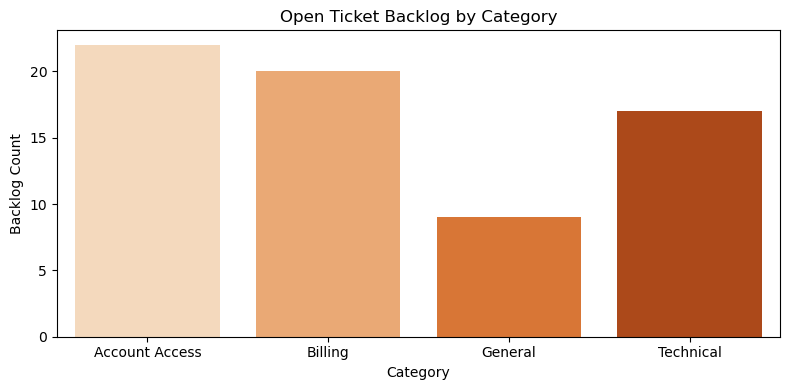

In [8]:
# =====================================
# 4. Ticket Backlog: Not Resolved or Still Open
# =====================================
backlog = df[df['Status'].isin(['Pending', 'In Progress'])]
backlog_summary = backlog.groupby('Category').size().reset_index(name='Backlog Count')
print("\nTicket Backlog by Category:")
print(backlog_summary)

plt.figure(figsize=(8, 4))
sns.barplot(data=backlog_summary, x='Category', y='Backlog Count', palette='Oranges')
plt.title('Open Ticket Backlog by Category')
plt.tight_layout()
plt.show()
